In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import datetime as dt
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

### посмотрим что мы имеем

In [2]:
data = pd.read_csv('earthquakes_data.csv', sep=',')
data

,year,month,date,hour,minute,seconds,lat,long,depth,class
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5
5,1990,1,1,18,2,34.067,35.1802,136.5092,11.0,2.5
6,1990,1,1,23,52,50.070,39.8000,143.7200,0.0,3.0
7,1990,1,2,6,53,12.093,35.5828,141.2393,24.7,2.9
8,1990,1,2,9,43,46.029,42.2963,142.3826,25.1,3.0
9,1990,1,2,10,4,50.086,39.6835,142.9171,34.0,3.4


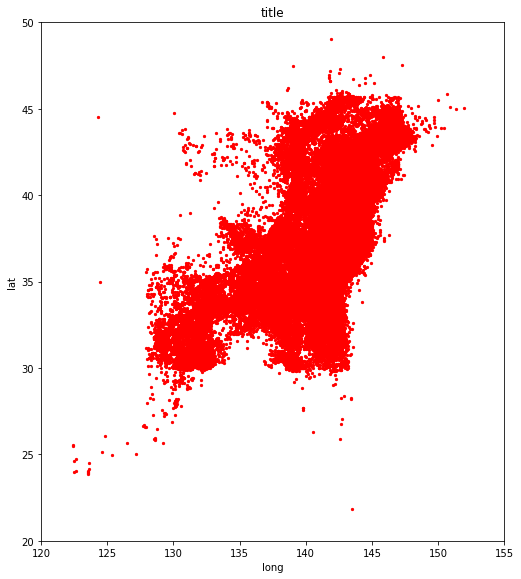

In [3]:
fig = plt.figure(figsize=(10.5 * m.cos(40 * m.pi / 180), 9))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(data['long'], data['lat'], color='red', marker='.', s=20)
plt.axis([120.0, 155.0, 20.0, 50.0])

axes.set_xlabel('long')
axes.set_ylabel('lat')
axes.set_title('title')

plt.show()

### Спроецируем Японию на плоскость

In [4]:
R_polus   = 6356.86
R_ekvator = 6378.20

def local_radius (longitude):
    return m.cos (longitude * m.pi / 180) * (R_ekvator - R_polus) + R_polus

R_japan = local_radius (37)

In [5]:
ORIGIN_LATITUDE  = 27.0
ORIGIN_LONGITUDE = 127.0

def spherical_to_cartesian (longitude, latitude):
    X = (longitude - ORIGIN_LONGITUDE) * m.pi / 180 * R_japan * m.cos (latitude * m.pi / 180)
    Y = (latitude  - ORIGIN_LATITUDE ) * m.pi / 180 * R_japan 
    
    return X, Y

data.shape

(247474, 10)

In [6]:
XY_massive = np.zeros((data.shape[0], 2))
j = 0
for i in tqdm(range (XY_massive.shape[0])):
    XY_massive[i][0], XY_massive[i][1] = spherical_to_cartesian (data['long'][i], data['lat'][i])

data['x'] = XY_massive[:, 0]
data['y'] = XY_massive[:, 1]
#data['lat'], data['long'] = spherical_to_cartesian (data['lat'], data['long'])

#### Посмотрим что получилось

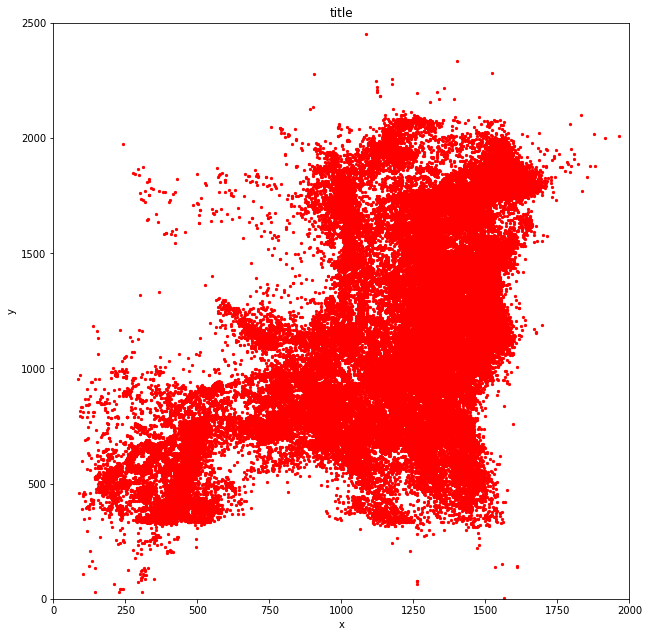

In [7]:
fig = plt.figure(figsize=(10, 10))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(data['x'], data['y'], color='red', marker='.', s=20)
plt.axis([0, 2000, 0, 2500])

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

plt.show()

In [8]:
a = np.zeros(20, dtype=int)
for i in tqdm(range (data.shape[0])):
    for threshold in range (20):
        if (data['class'][i] >= threshold/2) and (data['class'][i] < threshold/2 + 0.5):
            a[threshold] += 1
            break

            
# print ((a / data.shape[0] * 100).int())

    

#### Распечатаем сколько землетрясений и с какой амплитудой случалось

In [9]:
for i in range (a.shape[0]):
    print ('from ', i/2, ' to ', i/2+0.5, ' : %.2f' % (a[i]/data.shape[0]*100), '% of dots')


from  0.0  to  0.5  : 0.00 % of dots
from  0.5  to  1.0  : 0.00 % of dots
from  1.0  to  1.5  : 0.00 % of dots
from  1.5  to  2.0  : 0.00 % of dots
from  2.0  to  2.5  : 0.00 % of dots
from  2.5  to  3.0  : 51.02 % of dots
from  3.0  to  3.5  : 29.93 % of dots
from  3.5  to  4.0  : 11.94 % of dots
from  4.0  to  4.5  : 4.49 % of dots
from  4.5  to  5.0  : 1.65 % of dots
from  5.0  to  5.5  : 0.59 % of dots
from  5.5  to  6.0  : 0.23 % of dots
from  6.0  to  6.5  : 0.09 % of dots
from  6.5  to  7.0  : 0.03 % of dots
from  7.0  to  7.5  : 0.01 % of dots
from  7.5  to  8.0  : 0.00 % of dots
from  8.0  to  8.5  : 0.00 % of dots
from  8.5  to  9.0  : 0.00 % of dots
from  9.0  to  9.5  : 0.00 % of dots
from  9.5  to  10.0  : 0.00 % of dots


#### Посчитаем сколько дней прошло с 01.01.1990 до i-го землетрясения

In [10]:
time_massive = np.zeros (data.shape[0])

d_0 = dt.date (data['year'][0], data['month'][0], data['date'][0])
for i in tqdm(range (data.shape[0])):
    d_i = dt.date (data['year'][i], data['month'][i], data['date'][i])
    time_massive[i] = (d_i - d_0).days
    
data['time'] = time_massive

#### Посмотрим что имеем 

In [11]:
data

,year,month,date,hour,minute,seconds,lat,long,depth,class,x,y,time
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,1469.001496,1699.098417,0.0
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,1326.068924,1439.050722,0.0
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,1275.297146,1079.671839,0.0
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,1225.030854,1055.264556,0.0
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,1015.369695,891.310804,0.0
5,1990,1,1,18,2,34.067,35.1802,136.5092,11.0,2.5,864.632781,910.011188,0.0
6,1990,1,1,23,52,50.070,39.8000,143.7200,0.0,3.0,1429.027552,1423.943571,0.0
7,1990,1,2,6,53,12.093,35.5828,141.2393,24.7,2.9,1288.276622,954.798663,1.0
8,1990,1,2,9,43,46.029,42.2963,142.3826,25.1,3.0,1265.765445,1701.645941,1.0
9,1990,1,2,10,4,50.086,39.6835,142.9171,34.0,3.4,1362.707004,1410.983460,1.0


## Разбиение датасета по дням и по клетка в сетке

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import accuracy_score

In [13]:
LEFT_BORDER = 0
RIGHT_BORDER = 2000
DOWN_BORDER = 0
UP_BORDER = 2500

N_CELLS_HOR = 200
N_CELLS_VER = 250

print (data['time'][data.shape[0] - 1])
celled_data = torch.zeros ([int (data['time'][data.shape[0] - 1] + 1), 1, N_CELLS_HOR, N_CELLS_VER])
print (celled_data.shape)

for i in tqdm(range (data.shape[0])):
    if (data['x'][i] > LEFT_BORDER) and (data['x'][i] < RIGHT_BORDER) and (data['y'][i] > DOWN_BORDER) and (data['y'][i] < UP_BORDER):
        x = int (data['x'][i] / (RIGHT_BORDER - LEFT_BORDER) * N_CELLS_HOR)
        y = int (data['y'][i] / (UP_BORDER    - DOWN_BORDER) * N_CELLS_VER)
        celled_data[int(data['time'][i]), 0, x, y] = data['class'][i]
#         celled_data[int(data['time'][i]), 1, x, y] = data['depth'][i]
        
# celled_data
del data
        
    


9590.0
torch.Size([9591, 1, 200, 250])


In [14]:
print (celled_data.shape)
print (celled_data.dtype)

torch.Size([9591, 1, 200, 250])
torch.float32


In [15]:
# OBSERVED_DAYS = 32     # 1 months
# DAYS_TO_PREDICT = 4
# STEP = 10

# train_data   = torch.zeros ([0, OBSERVED_DAYS, N_CELLS_HOR, N_CELLS_VER])
# train_result = torch.zeros ([0,             1, N_CELLS_HOR, N_CELLS_VER])
# for i in tqdm(range (OBSERVED_DAYS, celled_data.shape[0] - DAYS_TO_PREDICT, STEP)):
#     current_history = torch.zeros ([0, N_CELLS_HOR, N_CELLS_VER])
#     for rest in range (OBSERVED_DAYS):   
#         current_history = torch.cat((current_history, celled_data[i - rest - 1, :, :, :]), dim=0)
#     current_history.unsqueeze(0)
#     train_data = torch.cat((train_data, current_history), dim=0)
    
# train_data   = torch.zeros ([0, OBSERVED_DAYS, N_CELLS_HOR, N_CELLS_VER])
# train_result = torch.zeros ([0,             1, N_CELLS_HOR, N_CELLS_VER])
# for i in tqdm(range (OBSERVED_DAYS, celled_data.shape[0] - DAYS_TO_PREDICT, STEP)):
#     current_history = torch.zeros ([0, N_CELLS_HOR, N_CELLS_VER])
#     for rest in range (OBSERVED_DAYS):
#         current_history = torch.cat((current_history, celled_data[i - rest, :, :, :]), dim=0)
#     current_history = current_history.unsqueeze(0)
#     train_data = torch.cat((train_data, current_history), dim=0)

#     train_result = torch.cat ((train_result, torch.sum (celled_data[i:(i + DAYS_TO_PREDICT), :, :, :], dim=0, keepdim=True)), dim=0)

#     print ('train_data', train_data.shape)
#     print ('train_result       ', train_result.shape)
    

In [16]:
# print (train_data.shape)
# print (train_result.shape)

# Обучение

In [17]:
DEVICE_ID = 0
DEVICE = torch.device('cuda:%d' % DEVICE_ID)
print (DEVICE)
torch.cuda.set_device(DEVICE_ID)

cuda:0


In [18]:
def my_accuracy (input, target, threshold):
    true = ((input>threshold) == target)
    sum = torch.sum (true.float())
    return sum/input.shape[0]/input.shape[1]/input.shape[2]/input.shape[3]

### Создадим датасет
#### (Может не влезть в оперативку (надо ~ 12Gb))

In [19]:
OBSERVED_DAYS = 32     # 1 months
DAYS_TO_PREDICT = 5
STEP = 10
TESTING_DAYS = 500

In [20]:
# range (celled_data.shape[0] - DAYS_TO_PREDICT - TESTING_DAYS, celled_data.shape[0] - DAYS_TO_PREDICT, STEP)
# range (OBSERVED_DAYS, celled_data.shape[0] - DAYS_TO_PREDICT - TESTING_DAYS, STEP)

class EartquakeDataset_MSE (Dataset):     # MSELoss
    def __init__(self, celled_data, indicies):
        
        self.data   = torch.zeros ([0, OBSERVED_DAYS, N_CELLS_HOR, N_CELLS_VER])
        self.result = torch.zeros ([0,             1, N_CELLS_HOR, N_CELLS_VER])
        for i in tqdm(indicies):
            current_history = celled_data[(i - OBSERVED_DAYS):(i), :, :, :].squeeze(1)
            current_history = current_history.unsqueeze(0)
            self.data   = torch.cat((self.data, current_history), dim=0)

            self.result = torch.cat ((self.result, torch.sum (celled_data[i:(i + DAYS_TO_PREDICT), :, :, :], dim=0, keepdim=True)), dim=0)
      
        print ('data_shape   = ', self.data.shape)
        print ('result_shape = ', self.result.shape)
        assert (self.data.shape[0] == self.result.shape[0])
        self.size = self.data.shape[0]
        
    def __len__ (self):
        return self.size
    
    def __getitem__(self, idx):
#         print ('data_shape = ', self.data[idx].shape)
#         print ('result_shape = ', self.result[idx].shape)
        return self.data[idx], self.result[idx]


In [21]:
HEAVY_QUAKE_THRES = 3.5

class EartquakeDataset_CE (Dataset):      #crossEntropyLoss
    def __init__(self, celled_data, indicies):
        
        self.data   = torch.FloatTensor (0, OBSERVED_DAYS, N_CELLS_HOR, N_CELLS_VER)
        self.result = torch.ByteTensor  (0,             1, N_CELLS_HOR, N_CELLS_VER)
        for i in tqdm(indicies):
            cur_history = celled_data[(i - OBSERVED_DAYS):(i), :, :, :].squeeze(1)
            cur_history = cur_history.unsqueeze(0)
            self.data   = torch.cat((self.data, cur_history), dim=0)
            
            cur_results = torch.sum ((celled_data[i:(i + DAYS_TO_PREDICT), :, :, :]>3.5), dim=0, keepdim=True)>0
            self.result = torch.cat ((self.result, cur_results), dim=0)
        
        print ('data_shape   = ', self.data.shape)
        print ('result_shape = ', self.result.shape)
        assert (self.data.shape[0] == self.result.shape[0])
        self.size = self.data.shape[0]
        
    def __len__ (self):
        return self.size
    
    def __getitem__(self, idx):
#         print ('data_shape = ', self.data[idx].shape)
#         print ('result_shape = ', self.result[idx].shape)
        return self.data[idx], self.result[idx]


In [22]:
earthquakes_dataset_train = EartquakeDataset_CE (celled_data,
                                                 range (OBSERVED_DAYS, celled_data.shape[0] - DAYS_TO_PREDICT - TESTING_DAYS, STEP)
                                                 )
earthquakes_dataset_test  = EartquakeDataset_CE (celled_data,
                                                 range (celled_data.shape[0] - DAYS_TO_PREDICT - TESTING_DAYS, celled_data.shape[0] - DAYS_TO_PREDICT, STEP)
                                                 )


data_shape   =  torch.Size([906, 32, 200, 250])
result_shape =  torch.Size([906, 1, 200, 250])



data_shape   =  torch.Size([50, 32, 200, 250])
result_shape =  torch.Size([50, 1, 200, 250])


In [23]:
# earthquakes_dataset_train = EartquakeDataset_MSE (celled_data,
#                                                  range (OBSERVED_DAYS, celled_data.shape[0] - DAYS_TO_PREDICT - TESTING_DAYS, STEP)
#                                                  )

# earthquakes_dataset_test  = EartquakeDataset_MSE (celled_data,
#                                                  range (celled_data.shape[0] - DAYS_TO_PREDICT - TESTING_DAYS, celled_data.shape[0] - DAYS_TO_PREDICT, STEP)
#                                                  )

In [24]:
print (earthquakes_dataset_train.data.shape)
print (earthquakes_dataset_test .result.shape)

print (earthquakes_dataset_train.data.dtype)
print (earthquakes_dataset_test .result.dtype)


torch.Size([906, 32, 200, 250])
torch.Size([50, 1, 200, 250])
torch.float32
torch.uint8


In [25]:
earthquakes_dataloader_train = DataLoader(earthquakes_dataset_train,
                                         batch_size=16,
                                         shuffle=True,
                                         num_workers=4)

earthquakes_dataloader_test  = DataLoader(earthquakes_dataset_test,
                                         batch_size=16,
                                         shuffle=False,
                                         num_workers=1)

### Создадим саму сеть

In [26]:
class conv_block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=1):
        super(conv_block, self).__init__()
        
        self.CONV  = nn.Conv2d    (in_channels,
                                   out_channels,
                                   kernel_size=kernel_size,
                                   stride=stride,
                                   padding=padding,
                                   bias=False)             # think about it later
        
        self.BNORM =nn.BatchNorm2d(out_channels,
                                   eps=1e-05,
                                   momentum=0.1,
                                   affine=False)
        self.RELU  = nn.ReLU ()
        
    def forward(self, x):
        #print ('sizeof(x) = ', x.size())
        #print ('sizeof(xprev) = ', xprev.size())    
        
        x = self.CONV   (x)
        x = self.BNORM  (x)
        x = self.RELU   (x)
        
        return x

In [27]:
class ConvNetwork_MSE (nn.Module):
    
    def __init__(self):
        super(ConvNetwork_MSE, self).__init__()
        
        self.features = nn.Sequential()
        
        self.features.add_module('conv1', conv_block(     OBSERVED_DAYS    , int (OBSERVED_DAYS/2 ), 3))
        self.features.add_module('conv2', conv_block(int (OBSERVED_DAYS/2 ), int (OBSERVED_DAYS/4 ), 3))
        self.features.add_module('conv3', conv_block(int (OBSERVED_DAYS/4 ), int (OBSERVED_DAYS/8 ), 3))
        self.features.add_module('conv4', conv_block(int (OBSERVED_DAYS/8 ), int (OBSERVED_DAYS/16), 3))
        self.features.add_module('conv5', conv_block(int (OBSERVED_DAYS/16),                      1, 3))
        
        # might be a good idea to add an extra full connected layer
        
    def forward(self, x):
#         print ('input  : ', x.shape)
        x = self.features(x)
#         print ('output : ', x.shape)
        return x
        

In [28]:
class ConvNetwork_CE (nn.Module):
    
    def __init__(self):
        super(ConvNetwork_CE, self).__init__()
        
        self.features = nn.Sequential()
        
        self.features.add_module('conv1', conv_block(     OBSERVED_DAYS    , int (OBSERVED_DAYS/2 ), 3))
        self.features.add_module('conv2', conv_block(int (OBSERVED_DAYS/2 ), int (OBSERVED_DAYS/4 ), 3))
        self.features.add_module('conv3', conv_block(int (OBSERVED_DAYS/4 ), int (OBSERVED_DAYS/8 ), 3))
        self.features.add_module('conv4', conv_block(int (OBSERVED_DAYS/8 ), int (OBSERVED_DAYS/16), 3))
        self.features.add_module('conv5', conv_block(int (OBSERVED_DAYS/16),                      1, 3))
        
        self.sigmoid = nn.Sigmoid ()
        # might be a good idea to add an extra full connected layer
        
    def forward(self, x):
#         print ('input  : ', x.shape)
        x = self.features(x)
        x = self.sigmoid (x)
#         print ('output : ', x.shape)
        return x
        

#### Функция тренеровки

In [29]:
def train_network_MSE(network, 
                      device,
                      dataloader_train,
                      dataloader_test,
                      epochs=164,
                      learning_rate=0.1):
    
    train_acc = []
    test_acc  = []
    net = network.to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate, weight_decay=0.0001, momentum=0.9)

    
    for epoch in tqdm(range(epochs)):  # loop over the dataset multiple times
        if epoch == epochs/2:
            optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate/10, weight_decay=0.0001, momentum=0.9) 
        elif epoch == epochs*3/4:
            optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate/100, weight_decay=0.0001, momentum=0.9) 
        
        net = net.train()        
        epoch_accuracy = 0.0
        epoch_elems = 0
        for data in dataloader_train:
            
            inputs = data[0].to(device)
            labels = data[1].to(device)
#             print ('inputs_shape = ', inputs.shape)
#             print ('labels_shape = ', labels.shape)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
#             print ('outputs : ', outputs.dtype)
#             print ('labels  : ', labels.dtype)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

#             print (loss)
            epoch_elems    += labels.shape[0]
            epoch_accuracy += loss.item()*labels.shape[0]

        epoch_accuracy /= epoch_elems
        train_acc.append(epoch_accuracy)
        
        
        # calculating test accuracy
        epoch_accuracy = 0.0
        epoch_elems = 0
        for data in dataloader_test:
            inputs = data[0].to(device)
            labels = data[1].to(device)   
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            
            epoch_elems    += labels.shape[0]
            epoch_accuracy += loss.item()*labels.shape[0]

        epoch_accuracy /= epoch_elems
        test_acc.append(epoch_accuracy)
        
        
        print('Epoch : ', epoch, 'acc_train : ', round (train_acc[-1], 4), 'acc_test : ', round (test_acc[-1], 4))

    print('Finished Training')
    
    plt.plot(train_acc, label='Train')
    plt.plot(test_acc , label='Test' )
    plt.legend()
    plt.grid()

In [30]:
# earthquake_netowrk = ConvNetwork_MSE ()
# train_network_MSE (earthquake_netowrk,
#                    torch.device(DEVICE),
#                    earthquakes_dataloader_train,
#                    earthquakes_dataloader_test,
#                    epochs=200,
#                    )

In [31]:
def train_network_CE (network, 
                      device,
                      dataloader_train,
                      dataloader_test,
                      epochs=164,
                      learning_rate=0.1):
    
    train_acc = []
    test_acc  = []
    net = network.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate, weight_decay=0.0001, momentum=0.9)

    
    for epoch in tqdm(range(epochs)):  # loop over the dataset multiple times
        if epoch == epochs/2:
            optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate/10, weight_decay=0.0001, momentum=0.9)
            print ('Changed learning rate to ', learning_rate/10)
        elif epoch == epochs*3/4:
            optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate/100, weight_decay=0.0001, momentum=0.9) 
            print ('Changed learning rate to ', learning_rate/100)
            
        net = net.train()        
        epoch_accuracy = 0.0
        epoch_elems = 0
        for data in dataloader_train:
            
            inputs = data[0].to(device)
            labels = data[1].to(device)
#             print ('inputs_shape = ', inputs.shape)
#             print ('labels_shape = ', labels.shape)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
#             print ('outputs : ', outputs.shape, outputs.dtype)
#             print ('labels  : ', labels.shape , labels.dtype)
            outputs = torch.cat ((1-outputs, outputs), dim=1)
#             print ('outputs ', outputs.shape, '   [', outputs[1, 0, 12, 12], outputs[1, 1, 12, 12], ']')
            loss = criterion(outputs, labels.squeeze(1).long())
            loss.backward()
            optimizer.step()

#             print (loss)
            epoch_elems    += labels.shape[0]
            epoch_accuracy += loss.item()*labels.shape[0]

        epoch_accuracy /= epoch_elems
        train_acc.append(epoch_accuracy)
        
        
#         calculating test accuracy
        epoch_accuracy = 0.0
        epoch_elems = 0
        for data in dataloader_test:
            inputs = data[0].to(device)
            labels = data[1].to(device)   
            outputs = net(inputs)
#             find_mistake(outputs)
            accuracy = my_accuracy (outputs, labels, 0.5)
#             accuracy2 = my_accuracy (outputs, labels, 1.0)
            
            epoch_elems    += labels.shape[0]
            epoch_accuracy += accuracy.item()*labels.shape[0]

        epoch_accuracy /= epoch_elems
        test_acc.append(epoch_accuracy)
        
        
        print('Epoch : ', epoch, 'acc_train : ', round (train_acc[-1], 7), 'acc_test : ', round (test_acc[-1], 4))

    print('Finished Training')
    
#     plt.plot(train_acc, label='Train')
    plt.plot(test_acc , label='Test' )
    plt.legend()
    plt.grid()

Epoch :  0 acc_train :  0.7049298 acc_test :  0.9791
Epoch :  1 acc_train :  0.6941156 acc_test :  0.981
Epoch :  2 acc_train :  0.6938509 acc_test :  0.972
Epoch :  3 acc_train :  0.6940951 acc_test :  0.9916
Epoch :  4 acc_train :  0.6941241 acc_test :  0.9848
Epoch :  5 acc_train :  0.6938223 acc_test :  0.9905
Epoch :  6 acc_train :  0.693647 acc_test :  0.9853
Epoch :  7 acc_train :  0.6939009 acc_test :  0.9883
Epoch :  8 acc_train :  0.6937102 acc_test :  0.9924
Epoch :  9 acc_train :  0.6936093 acc_test :  0.7103
Epoch :  10 acc_train :  0.6935812 acc_test :  0.9633
Epoch :  11 acc_train :  0.6936137 acc_test :  0.9782
Epoch :  12 acc_train :  0.6936979 acc_test :  0.9883
Epoch :  13 acc_train :  0.693648 acc_test :  0.986
Epoch :  14 acc_train :  0.6935388 acc_test :  0.9889
Epoch :  15 acc_train :  0.6935884 acc_test :  0.9926
Epoch :  16 acc_train :  0.6934726 acc_test :  0.9896
Epoch :  17 acc_train :  0.693519 acc_test :  0.9747
Epoch :  18 acc_train :  0.6934971 acc_test 

Epoch :  151 acc_train :  0.6931921 acc_test :  0.6369
Epoch :  152 acc_train :  0.6931854 acc_test :  0.6367
Epoch :  153 acc_train :  0.6931862 acc_test :  0.6365
Epoch :  154 acc_train :  0.6931913 acc_test :  0.6363
Epoch :  155 acc_train :  0.6931854 acc_test :  0.3418
Epoch :  156 acc_train :  0.6931892 acc_test :  0.3416
Epoch :  157 acc_train :  0.6931898 acc_test :  0.3415
Epoch :  158 acc_train :  0.6931874 acc_test :  0.3414
Epoch :  159 acc_train :  0.6931913 acc_test :  0.3413
Epoch :  160 acc_train :  0.6931888 acc_test :  0.3416
Epoch :  161 acc_train :  0.6931956 acc_test :  0.6363
Epoch :  162 acc_train :  0.6931885 acc_test :  0.6361
Epoch :  163 acc_train :  0.6931863 acc_test :  0.3417
Epoch :  164 acc_train :  0.6931867 acc_test :  0.3416
Epoch :  165 acc_train :  0.6931841 acc_test :  0.3414
Epoch :  166 acc_train :  0.693189 acc_test :  0.3413
Epoch :  167 acc_train :  0.6932058 acc_test :  0.6363
Epoch :  168 acc_train :  0.6931895 acc_test :  0.636
Epoch :  169

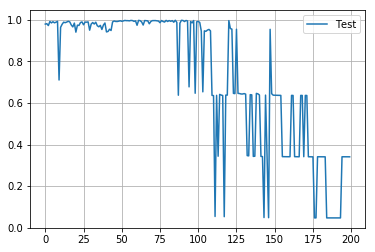

In [32]:
earthquake_network = ConvNetwork_CE ()
train_network_CE  (earthquake_network,
                   torch.device(DEVICE),
                   earthquakes_dataloader_train,
                   earthquakes_dataloader_test,
                   epochs=200,
                   learning_rate=0.1,
                   )

In [33]:
def print_ROCinfo (model, dataLoader, device, alpha=0.5, n_dots=101):
    model = model.to(device)
    
    
    threshold_massive = np.linspace (0, n_dots-1, n_dots, dtype=int)
    TP_massive = np.zeros (n_dots)
    FP_massive = np.zeros (n_dots)
    FN_massive = np.zeros (n_dots)
    TN_massive = np.zeros (n_dots)
    
    for data in dataLoader:
        inputs = data[0].to(device)
        labels = data[1].to(device)

        outputs = model(inputs)
        
        for threshold in threshold_massive:
            prediction = outputs>(threshold/n_dots)
            TP_massive[threshold] += torch.sum (prediction       * labels      ).float()
            FP_massive[threshold] += torch.sum (prediction       * (1 - labels)).float()
            FN_massive[threshold] += torch.sum ((1 - prediction) * labels      ).float()
            TN_massive[threshold] += torch.sum ((1 - prediction) * (1 - labels)).float()
            
    threshold_massive = threshold_massive / (n_dots-1)
    precision_massive = TP_massive / (TP_massive + FP_massive)
    TPR_massive       = TP_massive / (TP_massive + FN_massive)
    FPR_massive       = FP_massive / (FP_massive + TN_massive)

    # plot 1 precision
    fig1 = plt.figure(figsize=(10, 6))

    axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.plot(threshold_massive, precision_massive, 'r')

    axes.set_xlabel('threshold')
    axes.set_ylabel('precision')

    plt.show()
    
    # plot 2 recall
    fig = plt.figure(figsize=(10, 6))

    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.plot(threshold_massive, TPR_massive, 'r')

    axes.set_xlabel('threshold')
    axes.set_ylabel('recall')

    plt.show()
    
    # plot 3 ROC-curve
    fig = plt.figure(figsize=(8, 8))

    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.plot(FPR_massive, TPR_massive, 'r')
    axes.plot (range(2), range(2), 'grey', ls='--')

    axes.set_xlabel('FPR')
    axes.set_ylabel('TPR (recall)')
    axes.set_title('ROC-curve')

    plt.show()

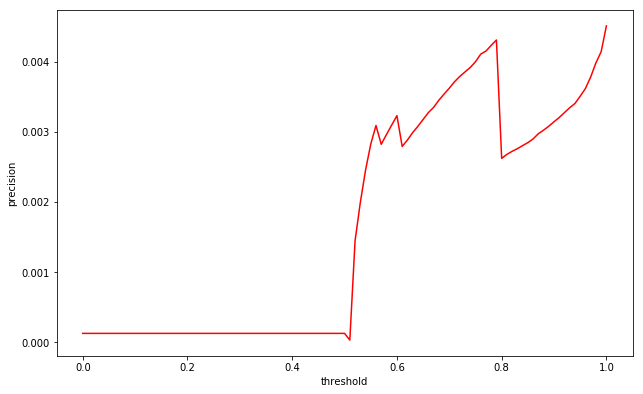

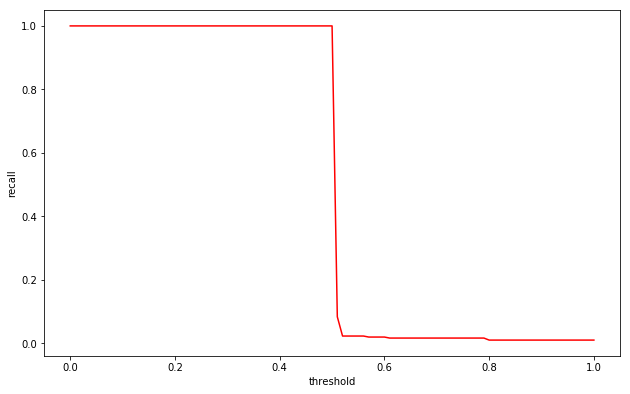

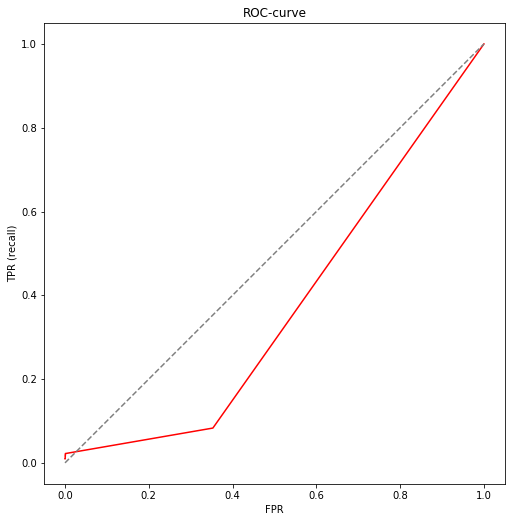

In [34]:
print_ROCinfo (earthquake_network,
               earthquakes_dataloader_test,
               DEVICE,
               ) 

In [35]:
def find_mistake (x):
    assert (torch.sum((x < 0.0) + (x > 1.0)) == 0)

In [36]:
# loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# print ('input  : ', input.shape, input.dtype)
# print (input)
# print (torch.sum (input, dim = 0))
# print ('target : ', target.shape, target.dtype)
# print (target)
# output = loss(input, target)
# output.backward()

In [37]:
# import torch
# from torch.utils.data import Dataset, DataLoader

# class someDataset (Dataset):
#     def __init__(self):
#         self.data = torch.ones ([100, 32, 10, 10])
#         self.labels = torch.ones ([100, 1, 10, 10])
#         self.len  = self.data.shape[0]
        
#         print (self.data.shape)
#         print (self.labels.shape)
        
#     def __len__ (self):
#         return self.len
    
#     def __getitem__(self, idx):
#         print ('data_shape = ', self.data[idx].shape)
#         print ('result_shape = ', self.labels[idx].shape)
#         return self.data[idx], self.labels[idx]

In [38]:
# some_dataset = someDataset()
# dataloader = DataLoader (some_dataset,
#                          batch_size=32,
#                          shuffle=True,
#                          num_workers=1,
#                          )

# for i, batch in enumerate(dataloader, 0):
#     data = batch[0]
#     print (i, 'data ', data.shape)
#     labels = batch[1]
#     print (i, 'labels ', labels.shape)
    


# # eartquakes_dataloader_train = DataLoader(earthquakes_dataset_train,
# #                                          batch_size=33,
# #                                          shuffle=True,
# #                                          num_workers=4)
